### The SIR Epidemic Model with Euler's Method

#### Applying Euler's method with recursive functions

Euler's method is a procedure proposed by the mathematician Leonhard Euler to approximate solutions to differential equations. The idea behind Euler's method is that when trying to determine the shape of a complicated function, instead of computing every point along the function's curve, we compute the slope of the tangent line at a certain point and approximate the next point on the curve by taking a small step along the tangent line [7].

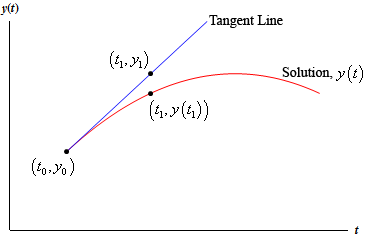 <br>
Fig 1. A graphical illustration of Euler's method. Euler's method uses the concept of local linearity to approximate solutions to differential equations. Here, we can approximate y(t1) using y(t0) and y'(t0).

We can implement Euler's method computationally to model the spread of disease. To start, we define three "step" functions, which take in information about the population at time t-1 and outputs the value of S, I, or R at time t.

In [1]:
#define recursive functions to perform Euler's method
def S_step(beta, gamma, delta_t, S, I, R):
  return S - (beta*S*I) * delta_t

def I_step(beta, gamma, delta_t, S, I, R):
  return I + (beta*S*I - gamma*I) * delta_t

def R_step(beta, gamma, delta_t, S, I, R):
  return R + (gamma*I) * delta_t

We can now run a sample simulation of disease progression by calling these functions recursively as below. We have set delta_t to 1, but tweaking the size of delta_t gives us better or worse approximations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#define parameters
beta = 0.2
gamma = 0.05
delta_t = 1
duration = 100

#define initial state
S = 0.9
I = 0.1
R = 0

#create lists to store our S, I, R values at different times
S_list = []
I_list = []
R_list = []

#recursively compute S, I, R
for i in range(duration):
  S = S_step(beta, gamma, delta_t, S, I, R)
  I = I_step(beta, gamma, delta_t, S, I, R)
  R = R_step(beta, gamma, delta_t, S, I, R)

  S_list.append(S)
  I_list.append(I)
  R_list.append(R)


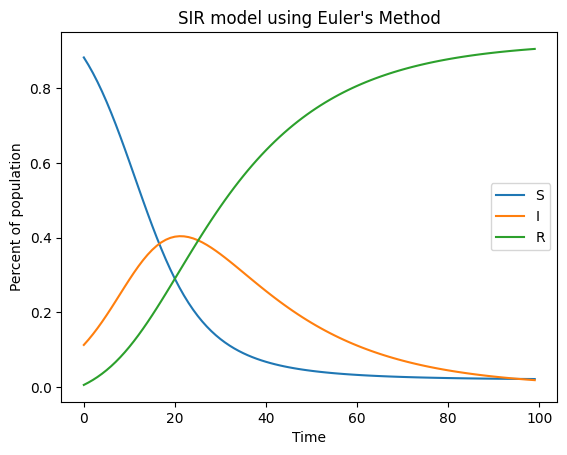

In [4]:
#plot S, I, R values over time
plt.plot(range(duration), S_list, label="S")
plt.plot(range(duration), I_list, label="I")
plt.plot(range(duration), R_list, label="R")
plt.legend()
plt.title("SIR model using Euler's Method")
plt.xlabel("Time")
plt.ylabel("Percent of population")
plt.show()

Fig 2. Sample SIR curves generated by implementing Euler's method with recursive functions. The y-values of the S, I, and R curves come from three lists (*S_list*, *I_list*, *R_list*) that record the values of integer variables *S*, *I*, and *R* at different times, as the integer variables are recursively updated. The generated curves show the expected characteristics of the SIR epidemic model.

#### Applying Euler's method with a time-dependent updating matrix

Instead of writing separate recursive functions to update the values of S, I, and R, we can use an updating matrix to update a state vector v = [S, I, R]. Like how we had delta_t, we are making a continuous dynamical system discrete here. Each matrix multiplication represents the passing of a discrete unit of time.

<br> One  complexity is that the updating matrix is itself is being updated. This makes it different from the updating matrices we looked at in class, because unlike those matrices, our matrix here is time-dependent (because the entries depend on  I, which varies with time).

The step function now involves computing the updating matrix for that specific time and applying it to the state vector via matrix multiplication.

In [5]:
def step(beta, gamma, state):
  updating_matrix = [[1-beta*state[1],   0,           0], 
                     [beta*state[1],     1-gamma,     0], 
                     [0,                 gamma,       1]] #the matrix is time dependent. we recompute the matrix at every time step
  next_state = np.dot(updating_matrix, state)
  return next_state


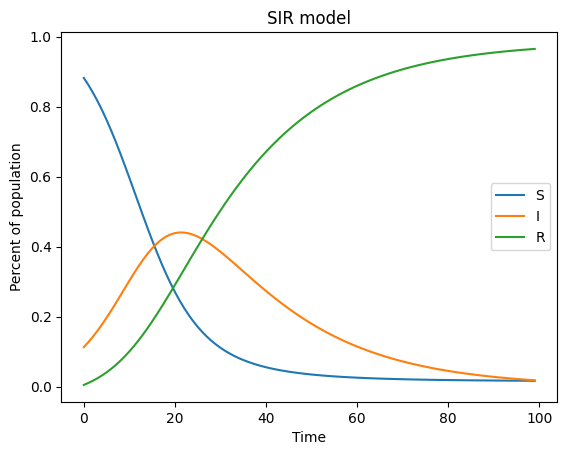

In [6]:
beta = 0.2
gamma = 0.05
duration = 100

state = [0.9, 0.1, 0]

state_list = []

for i in range(duration):
  state = step(beta, gamma, state)
  state_list.append(state)

plt.plot(range(duration), state_list)
plt.legend(['S','I','R'])
plt.title('SIR model')
plt.xlabel('Time')
plt.ylabel('Percent of population')
plt.show()


Fig 3. Sample SIR curves generated by implementing Euler's method with a time-dependent updating matrix. The y-values of the S, I, and R curves come from a list (*state_list*) that records the values of the 3x1 vector *state* at different times, as *state* is continuously updated by the updating matrix (which itself is updated in every iteration). The generated curves show the expected characteristics of the SIR epidemic model.

#### Exploring how beta and gamma parameters affect epidemic progression

Now we will explore how different parameters affect the spread of disease. To make it easier, we wrap everything we did earlier in a function called "simulate" which we can call with different parameters.

In [7]:
def simulate(state_0, beta, gamma, duration):
  state = state_0
  state_list = []

  for i in range(duration):
    state = step(beta, gamma, state)
    state_list.append(state)
  
  return state_list
  

##### Tweaking beta

We can tweak our parameter beta to see how it affects the disease's spread. Beta accounts for the transmissibility of the disease and the mean number of contacts each infected individual makes. Measures like social distancing,self-quarantining, masking, and vaccination all reduce this value.

Text(0.5, 1.0, 'beta=.8, gamma=.1')

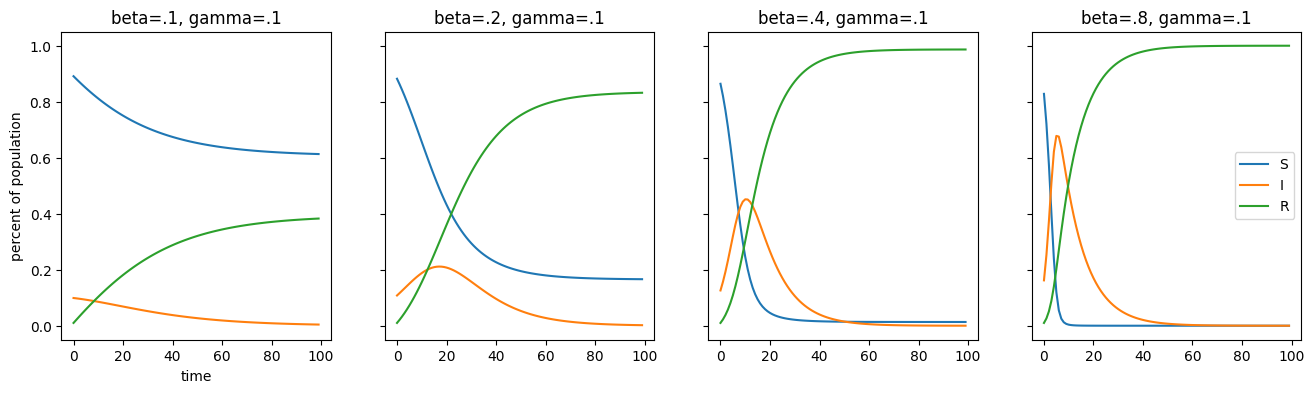

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(16, 4))
ax1.plot(range(duration), simulate([.9,.1,0],.1,.1,100))
ax1.set_title('beta=.1, gamma=.1')
plt.legend(['S','I','R'])
ax1.set_xlabel('time')
ax1.set_ylabel('percent of population')

ax2.plot(range(duration), simulate([.9,.1,0],.2,.1,100))
plt.legend(['S','I','R'])
ax2.set_title('beta=.2, gamma=.1')

ax3.plot(range(duration), simulate([.9,.1,0],.4,.1,100))
plt.legend(['S','I','R'])
ax3.set_title('beta=.4, gamma=.1')

ax4.plot(range(duration), simulate([.9,.1,0],.8,.1,100))
plt.legend(['S','I','R'])
ax4.set_title('beta=.8, gamma=.1')

Fig 4. Four sets of SIR curves with increasing beta. As the value of beta increases, the infection curve becomes more narrow and tall, the susceptible curve drops more sharply, and the removed curve is steeper and reaches a higher y value. These changes correspond to people being infected at a higher rate, which will lead to a greater strain on the healthcare system and more deaths from the disease.

Looking at the SIR generated, we can see that as beta increases, the I (infected) curve has a sharper spike, the S (susceptible) curve drops more quickly, and the removed curve increases more quickly. In real life, beta can be reduced by measures that decrease disease transmissibility, such as masking and vaccination; this is what people mean by "flattening the curve." We will next explore how tweaking the value of gamma affects SIR curves, then discuss the results in combination in more detail.

##### Tweaking gamma

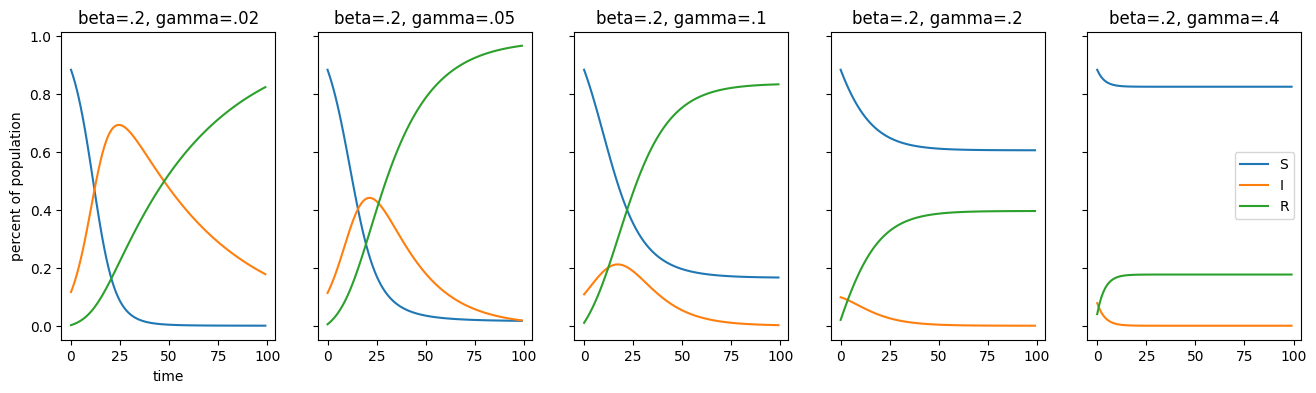

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(16, 4))
ax1.plot(range(duration), simulate([.9,.1,0],.2,.02,100))
ax1.set_title('beta=.2, gamma=.02')
ax1.set_xlabel('time')
ax1.set_ylabel('percent of population')

ax2.plot(range(duration), simulate([.9,.1,0],.2,.05,100))
ax2.set_title('beta=.2, gamma=.05')

ax3.plot(range(duration), simulate([.9,.1,0],.2,.1,100))
ax3.set_title('beta=.2, gamma=.1')

ax4.plot(range(duration), simulate([.9,.1,0],.2,.2,100))
ax4.set_title('beta=.2, gamma=.2')

ax5.plot(range(duration), simulate([.9,.1,0],.2,.4,100))
ax5.set_title('beta=.2, gamma=.4')
plt.legend(['S','I','R'])

Fig 5. Four sets of SIR curves with increasing gamma. As the value of gamma increases, the infection curve becomes more flat, the susceptible curve drops more slowly, and the removed curve reacts to changes in the infected curve more rapidly. These changes correspond to people recovering or dying from the disease more quickly, and for the disease to therefore be transmitted less.

Holding beta constant and increasing gamma, we observe a later and lower peak of the infected curve and an earlier rise in the removed curve. The effects of changing beta and gamma that we observed agree with findings reported in literature [8]. Together, these epidemic curves generated with different beta and gamma values demonstrate how the rate of change for new infections depends on the basic reproduction number, defined as “the number of secondary cases which one case would produce in a completely susceptible population.” The basic reproductive number is also equals to beta/gamma, which is why increasing beta increases the basic reproductive number, while increasing gamma decreases the basic reproductive number.

Flattening the curve is critical to slowing down the spread of an infectious disease. The goal is to spread out the number of cases over a longer period of time, so that the healthcare system does not become overwhelmed. Several public health interventions, including masking, social distancing, and lockdowns, can be used to achieve this goal. In addition, when infectious diseases are more deadly and have a higher removal rate, even though they may also have high reproduction numbers, the spread is less due to less ability for infected individuals to pass on the disease to others, and thus flattening the curve as well.

#### Visualizing epidemic progressions in 3D

Instead of visualizing the disease' progression as three separate curves representing the susceptible, infected, and removed proportions of the population, we can visualize it as one curved line through three dimension space.

In [10]:
# some helper functions
def get_S_list(state_list):
  return [array[0] for array in state_list]

def get_I_list(state_list):
  return [array[1] for array in state_list]

def get_R_list(state_list):
  return [array[2] for array in state_list]


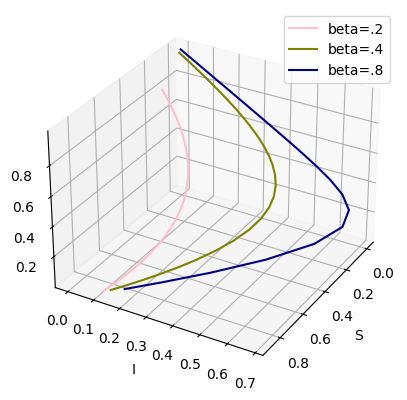

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')

# Plot the data as a 3D line graph
run1 = simulate([.9,.1,0],.2,.1,100)
run2 = simulate([.9,.1,0],.4,.1,100)
run3 = simulate([.9,.1,0],.8,.1,100)

ax.plot(get_S_list(run1), get_I_list(run1), get_R_list(run1), "pink", label = "beta=.2")
ax.plot(get_S_list(run2), get_I_list(run2), get_R_list(run2), "olive", label = "beta=.4")
ax.plot(get_S_list(run3), get_I_list(run3), get_R_list(run3), "navy", label = "beta=.8")
ax.legend()

ax.view_init(30, 30)


Fig 6. Three curves representing three disease progressions with different beta values. The coordinate (x, y, z) of any point along a curve tells us the percentages of the population that is susceptible, infected, and removed. Comparing the three curves, we see that the beta = 0.8 curve attains the highest value along the I axis. This result shows that a higher transmission rate not only causes people to be infected more quickly, but for a larger percentage of the population to be infected at once.

The benefit of this three dimensional visualization is that it highlights why beta values matters: we can see that they have vastly different maximum I values. This has real-life implications because it shows how many people are infected at the same time - the higher this number is, the more strained hospitals are, and the more likely people are to die instead of recover.

#### Predicting epidemic progressions from any initial state using a vector field

What if, instead of predicting disease progression from one particular initial state (i.e. [S_0, I_0, R_0]), we want a visualization that enables us to predict the direction that the epidemic will progress in at any state?

To accomplish this, for a particular beta and gamma value, we can visualize the vector field of the "time step vectors" (i.e. [S_t - S_t-1, I_t - I_t-1, R_t - R_t-1]) at each  (S, I, R) point. These "time step vectors" are the vectors we add to the vector representing the current state to get the vector representing the next state. 

Before we plot this vector field in 3D, to gain intuition, we first plot a simplified 2D version of the vector field with S along the x-axis and I along the y-axis. Note that we only show the part of the vector field for which S + I <= 1, since the sum of the susceptible and infected groups can never exceed 100% of the population.

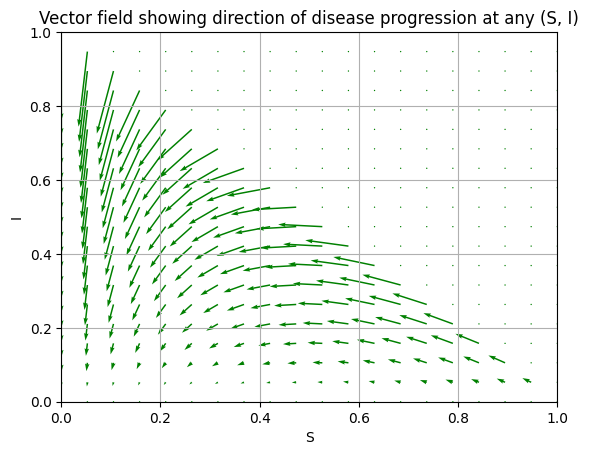

In [12]:
# Set beta and gamma for our example
beta = 0.2
gamma = 0.1


x, y = np.meshgrid(np.linspace(0, 1, 20), 
                   np.linspace(0, 1, 20))

# Directional vectors
u = - (beta*x*y)
v = + (beta*x*y - gamma*y)

# Add constraint that S + I <= 1
u[x+y>1] = 0
v[x+y>1] = 0
  
# Plotting vector field with QUIVER
plt.quiver(x, y, u, v, color='g')
plt.title('Vector field showing direction of disease progression at any (S, I)')
  
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel("S")
plt.ylabel("I")
  
plt.grid()
plt.show()

Fig 7. 2D vector field showing the expected direction of disease progression at any state of the population. To predict disease progression at a given condition, we find the given (S, I) coordinate in the vector field and follow the vector at that coordinate.


Having gained this intuition, we now visualize the vector field in 3D. Note that we are only interested in vectors on the plane representing the condition S + I + R = 1. Only vectors on this plane has real-life significance.

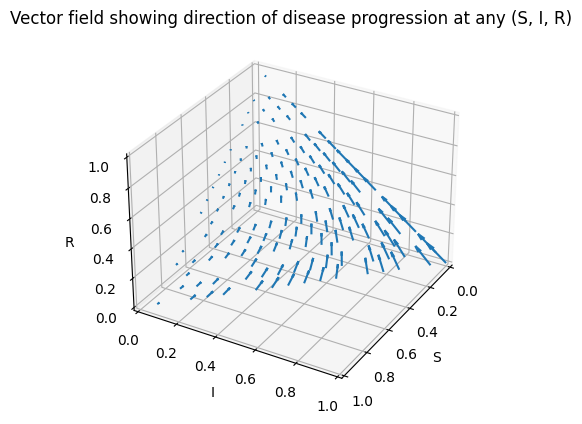

In [14]:
beta = 0.2
gamma = 0.1

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')

x, y, z = np.meshgrid(np.linspace(0, 1, 20),
                      np.linspace(0, 1, 20),
                      np.linspace(0, 1, 20))

u = - (beta * x * y)
v = + (beta * x * y - gamma * y) 
w = + (gamma * y)

# create a mask to set values outside of the plane to zero
mask = np.where(x+y+z==1, True, False)
u[~mask] = 0
v[~mask] = 0
w[~mask] = 0

# plot the vector field
vf = ax.quiver(x, y, z, u, v, w)

ax.view_init(elev=30, azim=30)
plt.title('Vector field showing direction of disease progression at any (S, I, R)')
plt.show()

Fig 8. 3D vector field showing the expected direction of disease progression at any state of the population. To predict disease progression at a given condition, we find the given (S, I, R) coordinate in the vector field and follow the vector at that coordinate.

With such a vector field plot, we can answer the general question: in what direction will the epidemic progress if the current susceptible percentage of the population is x, the current infected percentage of the population is y, and the removed percentage of the population is z? <br> 

Once again, the benefit of using the vector field visualization as opposed to the SIR curves visualization is that the vector field allows us to predict disease progression for any given initial state of the population, rather than one particular initial state.